 company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer. 

The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:

1. Add the column names to both datasets:

i. Column Name for customer details table:

           customer_id, 

           Gender,

           age, 

           driving licence present,

           region code, 

           previously insured, 

           vehicle age 

           and vehicle damage, in respective order. 

ii. Column Name for customer_policy table:

           customer_id, 

           annual premium (in Rs), 

           sales channel code, 

           vintage and response. 

2. Checking and Cleaning Data Quality:

i. Null values

Generate a summary of count of all the null values column wise
Drop Null values for customer_id because central tendencies for id’s is not feasible.
Replace all null values for numeric columns by mean. 
Replace all null values for Categorical value by mode.
ii. Outliers

Generate a summary of count of all the outliers column wise
Replace all outlier values for numeric columns by mean. 
(Hint1: for outlier treatment use IQR method as follows:

For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

Hint2: For getting percentile value, explore pd.describe() function)

iii. White spaces

Remove white spaces
iv. case correction(lower or upper, any one) 

v. Convert nominal data (categorical) into dummies 

for future modeling use if required
vi. Drop Duplicates (duplicated rows)

3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

(Hint: use pd.merge() function)

4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

 i. Gender wise average annual premium

ii. Age wise average annual premium

iii. Is your data balanced between the genders?

          (Hint: Data is balanced if number of counts in each group is approximately same)

iv. Vehicle age wise average annual premium.

5. Is there any relation between Person Age and annual premium?

Hint: use correlation function (Correlation describes the relationship between two variables). 

Correlation coefficient < -0.5           - Strong negative relationship

Correlation coefficient > 0.5            -  Strong positive relationship

0.5 < Correlation coefficient < 0.5   - There is no relationship. 

In [82]:
import pandas as pd
import seaborn as sns
df=pd.read_csv(r"C:\Users\Dell\Desktop\customer_details.csv", names=['customer_id','Gender','age','driving_licence_present','regioncode','previously_insured','vehicle_age','vehicle_damage'], header=0)
df

,customer_id,Gender,age,driving_licence_present,regioncode,previously_insured,vehicle_age,vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [83]:
df.isnull()

,customer_id,Gender,age,driving_licence_present,regioncode,previously_insured,vehicle_age,vehicle_damage
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
381104,False,False,False,False,False,False,False,False
381105,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False


In [84]:
df.isnull().sum()

customer_id                386
Gender                     368
age                        368
driving_licence_present    393
regioncode                 392
previously_insured         381
vehicle_age                381
vehicle_damage             407
dtype: int64

In [85]:
df.describe()

,customer_id,age,driving_licence_present,regioncode,previously_insured
count,380723.000000,380741.000000,380716.000000,380717.000000,380728.000000
mean,190548.776244,38.822827,0.997867,26.388575,0.458246
std,110016.805160,15.512120,0.046133,13.230361,0.498254
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [86]:
df

,customer_id,Gender,age,driving_licence_present,regioncode,previously_insured,vehicle_age,vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [87]:
# drop a null values
df.dropna(subset=['customer_id'], how='any').shape

(380723, 8)

In [88]:
df1=df.dropna(subset=['customer_id'], how='any')
df1

,customer_id,Gender,age,driving_licence_present,regioncode,previously_insured,vehicle_age,vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [89]:
df1

,customer_id,Gender,age,driving_licence_present,regioncode,previously_insured,vehicle_age,vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [90]:
#Replace all null values for numeric columns by mean

df1["age"].fillna(df1["age"].mean(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\1819685179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["age"].fillna(df1["age"].mean(), inplace=True)


In [91]:
#Replace all null values for Categorical value by mode.

df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\1403585681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)


In [92]:
df1['driving_licence_present'].fillna(df1['driving_licence_present'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\3976047708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['driving_licence_present'].fillna(df1['driving_licence_present'].mode()[0], inplace=True)


In [93]:
df1['regioncode'].fillna(df1['regioncode'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\2785146840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['regioncode'].fillna(df1['regioncode'].mode()[0], inplace=True)


In [94]:
df1['previously_insured'].fillna(df1['previously_insured'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\2714527049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['previously_insured'].fillna(df1['previously_insured'].mode()[0], inplace=True)


In [95]:
df1['vehicle_age'].fillna(df1['vehicle_age'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\3668392359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['vehicle_age'].fillna(df1['vehicle_age'].mode()[0], inplace=True)


In [96]:
df1['vehicle_damage'].fillna(df1['vehicle_damage'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\660018350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['vehicle_damage'].fillna(df1['vehicle_damage'].mode()[0], inplace=True)


In [97]:
df1.isnull().sum()

customer_id                0
Gender                     0
age                        0
driving_licence_present    0
regioncode                 0
previously_insured         0
vehicle_age                0
vehicle_damage             0
dtype: int64

In [98]:
df1

,customer_id,Gender,age,driving_licence_present,regioncode,previously_insured,vehicle_age,vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [99]:
df1.describe()

,customer_id,age,driving_licence_present,regioncode,previously_insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997870,26.391090,0.457800
std,110016.805160,15.504826,0.046105,13.223772,0.498217
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

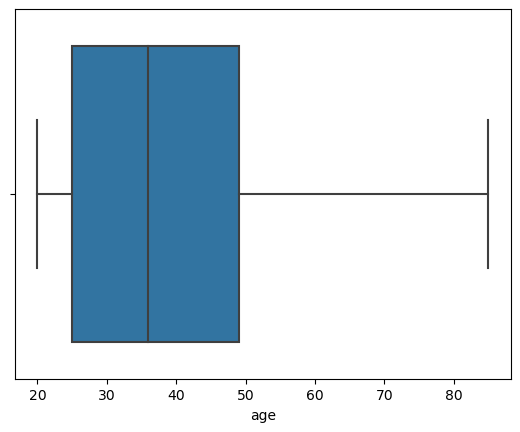

In [100]:
sns.boxplot(df1['age'])

In [101]:
#IQR method
q1=df1['age'].quantile(0.25)
q3=df1['age'].quantile(0.75)
iqr = q3 - q1

print('q1:',q1)
print("q2: ",q3)
print("iqr: ", iqr)

q1: 25.0
q2:  49.0
iqr:  24.0


In [102]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)

print(upper_limit)
print(lower_limit)

85.0
-11.0


In [103]:
#find the outlier

((df1['age']>upper_limit)|(df1['age']<lower_limit)).sum()

0

In [104]:
#del the outlier data

new_df1= df1.loc[(df1['age']<upper_limit)&(df1['age']>lower_limit)]
print('before removing outlier: ', len(df1))
print('after removing outlier: ', len(new_df1))
print('outlier: ', len(df1)-len(new_df1))

before removing outlier:  380723
after removing outlier:  380712
outlier:  11


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

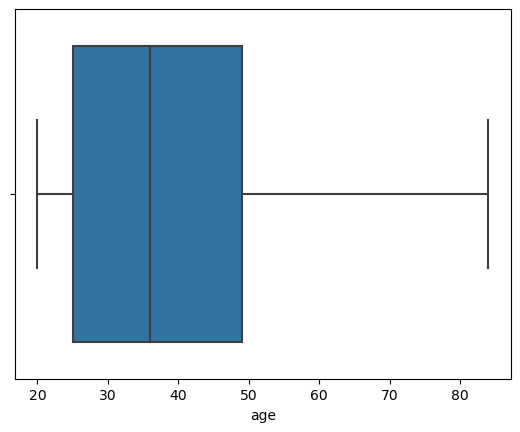

In [105]:

sns.boxplot(new_df1['age'])

In [106]:
#Mean method 

new_df1=df1.copy()
mean=new_df1['age'].mean()
new_df1.loc[(new_df1['age']>upper_limit), 'age']= mean
new_df1.loc[(new_df1['age']<lower_limit), 'age']= mean

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

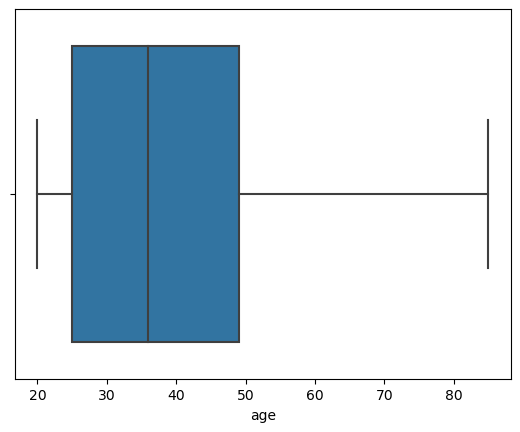

In [107]:
sns.boxplot(new_df1['age'])

In [108]:
new_df1

,customer_id,Gender,age,driving_licence_present,regioncode,previously_insured,vehicle_age,vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [109]:
#Remove white spaces

new_df1.apply(lambda x:x.str.strip()if x.dtype=='object' else x)

,customer_id,Gender,age,driving_licence_present,regioncode,previously_insured,vehicle_age,vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [110]:
#case correction(lower or upper, any one) 

print(new_df1['Gender'].str.upper())

0           MALE
1           MALE
2           MALE
3           MALE
4         FEMALE
           ...  
381104      MALE
381105      MALE
381106      MALE
381107    FEMALE
381108      MALE
Name: Gender, Length: 380723, dtype: object


In [111]:
#Convert nominal data (categorical) into dummies 

dummy_df1 = new_df1.copy()
dummy_df1 = pd.get_dummies(dummy_df1, columns=['Gender','driving_licence_present','regioncode','previously_insured','vehicle_age','vehicle_damage'])
display(dummy_df1)

,customer_id,age,Gender_Female,Gender_Male,driving_licence_present_0.0,driving_licence_present_1.0,regioncode_0.0,regioncode_1.0,regioncode_2.0,regioncode_3.0,...,regioncode_50.0,regioncode_51.0,regioncode_52.0,previously_insured_0.0,previously_insured_1.0,vehicle_age_1-2 Year,vehicle_age_< 1 Year,vehicle_age_> 2 Years,vehicle_damage_No,vehicle_damage_Yes
0,1.0,44.0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,2.0,76.0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2,3.0,47.0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,4.0,21.0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,5.0,29.0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105.0,74.0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
381105,381106.0,30.0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
381106,381107.0,21.0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
381107,381108.0,68.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [112]:
#Drop Duplicates (duplicated rows)


new_df1.duplicated(subset='customer_id')

0         False
1         False
2         False
3         False
4         False
          ...  
381104    False
381105    False
381106    False
381107    False
381108    False
Length: 380723, dtype: bool

In [113]:
new_df1.duplicated(subset='customer_id').sum()

0

In [114]:
new_df1.drop_duplicates(keep='first').shape

(380723, 8)

# coustomer policy table

In [115]:
#coustomer policy table
import pandas as pd
df2=pd.read_csv(r"C:\Users\Dell\Desktop\customer_policy_details.csv", names=['customer_id','annual_premium','sales_channel_code','vintage','response'], header=0)
df2

,customer_id,annual_premium,sales_channel_code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [116]:
#Drop Null values for customer_id

df3 = df2.dropna(subset=['customer_id'], how='any')
df3

,customer_id,annual_premium,sales_channel_code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [117]:
#Replace all null values for numeric columns by mean

df3["annual_premium"].fillna(df3["annual_premium"].mean(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\581045569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["annual_premium"].fillna(df3["annual_premium"].mean(), inplace=True)


In [118]:
#Replace all null values for Categorical value by mode.


df3['sales_channel_code'].fillna(df3['sales_channel_code'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\2968160533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sales_channel_code'].fillna(df3['sales_channel_code'].mode()[0], inplace=True)


In [119]:
df3['vintage'].fillna(df3['vintage'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\2799924019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['vintage'].fillna(df3['vintage'].mode()[0], inplace=True)


In [120]:
df3['response'].fillna(df3['response'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_416\3192210525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['response'].fillna(df3['response'].mode()[0], inplace=True)


In [121]:
df3.isnull().sum()

customer_id           0
annual_premium        0
sales_channel_code    0
vintage               0
response              0
dtype: int64

In [122]:
df3

,customer_id,annual_premium,sales_channel_code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [123]:
df3.describe()

,customer_id,annual_premium,sales_channel_code,vintage,response
count,380722.000000,380722.000000,380722.000000,380722.000000,380722.000000
mean,190547.491663,30563.999774,112.078674,154.450788,0.122410
std,110013.824148,17190.147550,54.192513,83.690971,0.327759
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24416.000000,29.000000,82.000000,0.000000
50%,190536.500000,31656.000000,136.000000,154.000000,0.000000
75%,285818.750000,39391.750000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


In [124]:
#IQR method

Q1 = df3['annual_premium'].quantile(0.25)
Q3 = df3['annual_premium'].quantile(0.75)
IQR = Q3 - Q1

print('Q1:',Q1)
print("Q2: ",Q3)
print("IQR: ", IQR)

Q1: 24416.0
Q2:  39391.75
IQR:  14975.75


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_premium'>

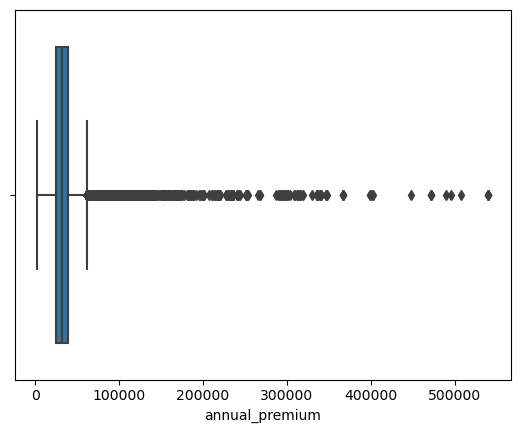

In [125]:

# Box Plot
import seaborn as sns
sns.boxplot(df3['annual_premium'])

In [126]:
#IQR method
Q1=df3['annual_premium'].quantile(0.25)
Q3=df3['annual_premium'].quantile(0.75)
IQR = Q3 - Q1

print('Q1:',Q1)
print("Q2: ",Q3)
print("IQR: ", IQR)

Q1: 24416.0
Q2:  39391.75
IQR:  14975.75


In [127]:
upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)

print(upper_limit)
print(lower_limit)

61855.375
1952.375


In [128]:
#Find ouliers

df3.loc[(df3['annual_premium']>upper_limit)|(df3['annual_premium']<lower_limit)]

,customer_id,annual_premium,sales_channel_code,vintage,response
25,26.0,61964.0,152.0,72.0,0.0
37,38.0,76251.0,152.0,107.0,0.0
67,68.0,66338.0,124.0,73.0,0.0
139,140.0,62164.0,152.0,116.0,0.0
149,150.0,76651.0,152.0,258.0,0.0
...,...,...,...,...,...
380959,380960.0,61909.0,152.0,161.0,0.0
380998,380999.0,101664.0,124.0,21.0,0.0
381035,381036.0,62889.0,152.0,295.0,0.0
381047,381048.0,71915.0,7.0,233.0,0.0


In [129]:
#del the outlier data

new_df3= df3.loc[(df3['annual_premium']<upper_limit)&(df3['annual_premium']>lower_limit)]
print('before removing outlier: ', len(df3))
print('after removing outlier: ', len(new_df3))
print('outlier: ', len(df3)-len(new_df3))

before removing outlier:  380722
after removing outlier:  370390
outlier:  10332


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_premium'>

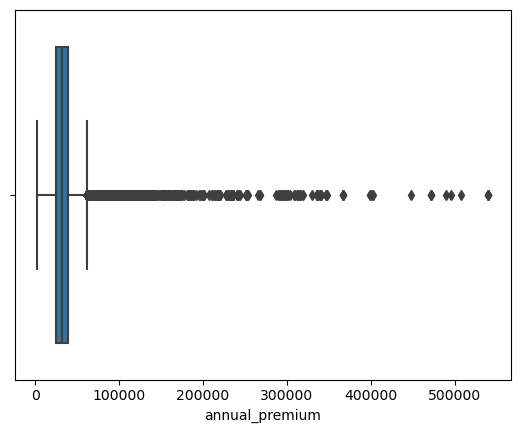

In [130]:
#before removing outliers

sns.boxplot(df3['annual_premium'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_premium'>

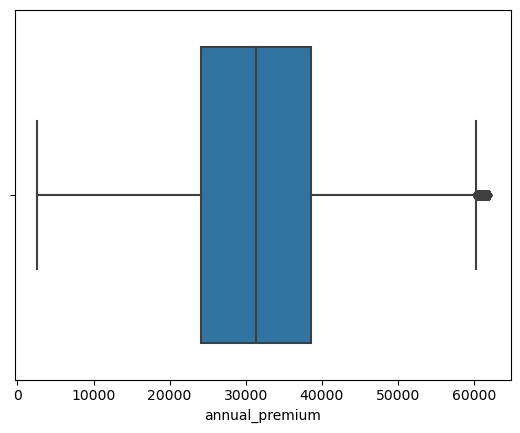

In [131]:
#after removing outliers

sns.boxplot(new_df3['annual_premium'])

In [132]:
#Mean method

new_df3=df3.copy()
mean=new_df3['annual_premium'].mean()
new_df3.loc[(new_df3['annual_premium']>upper_limit), 'annual_premium']= mean
new_df3.loc[(new_df3['annual_premium']<lower_limit), 'annual_premium']= mean


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_premium'>

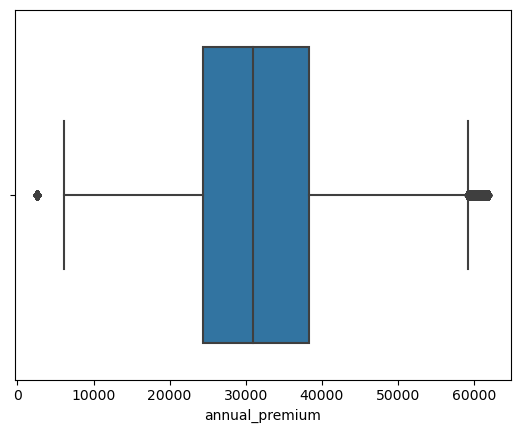

In [133]:
sns.boxplot(new_df3['annual_premium'])

In [134]:
len(df3)

380722

In [135]:
len(new_df3)

380722

In [136]:
#Remove white spaces

new_df3.apply(lambda x:x.str.strip()if x.dtype=='object' else x)

,customer_id,annual_premium,sales_channel_code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [137]:
#Convert nominal data (categorical) into dummies 

dummy_df3 = new_df3.copy()
dummy_df3 = pd.get_dummies(dummy_df3, columns=['sales_channel_code','vintage','response'])
display(dummy_df3)

,customer_id,annual_premium,sales_channel_code_1.0,sales_channel_code_2.0,sales_channel_code_3.0,sales_channel_code_4.0,sales_channel_code_6.0,sales_channel_code_7.0,sales_channel_code_8.0,sales_channel_code_9.0,...,vintage_292.0,vintage_293.0,vintage_294.0,vintage_295.0,vintage_296.0,vintage_297.0,vintage_298.0,vintage_299.0,response_0.0,response_1.0
0,1.0,40454.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,33536.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.0,38294.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,28619.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,27496.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105.0,30170.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
381105,381106.0,40016.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
381106,381107.0,35118.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
381107,381108.0,44617.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [138]:
#Drop Duplicates (duplicated rows)


new_df3.duplicated(subset='customer_id')

0         False
1         False
2         False
3         False
4         False
          ...  
381104    False
381105    False
381106    False
381107    False
381108    False
Length: 380722, dtype: bool

In [139]:
new_df3.duplicated(subset='customer_id').sum()

0

In [140]:
new_df3.drop_duplicates(keep='first').shape

(380722, 5)

In [141]:
#Create a Master table for future use. Join the customer table and customer_policy table to get a master table using
#customer_id in both tables


df_mas=pd.merge(new_df1, new_df3, on='customer_id')
df_mas

,customer_id,Gender,age,driving_licence_present,regioncode,previously_insured,vehicle_age,vehicle_damage,annual_premium,sales_channel_code,vintage,response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


In [142]:
# Gender wise average annual premium

df_mas[['Gender','annual_premium']].groupby('Gender').mean()

,annual_premium
Gender,
Female,29273.474247
Male,29323.099677


In [143]:
df_mas[['Gender','annual_premium']]

,Gender,annual_premium
0,Male,40454.0
1,Male,33536.0
2,Male,38294.0
3,Male,28619.0
4,Female,27496.0
...,...,...
380331,Male,30170.0
380332,Male,40016.0
380333,Male,35118.0
380334,Female,44617.0


In [144]:
#Age wise average annual premium
df_mas[['age','annual_premium']].groupby('age').mean()

,annual_premium
age,
20.0,26342.073517
21.0,29751.791916
22.0,29946.848634
23.0,29838.344763
24.0,30125.557096
...,...
81.0,29287.910702
82.0,36480.586199
83.0,28995.818172


In [145]:
df_mas[['age','annual_premium']]

,age,annual_premium
0,44.0,40454.0
1,76.0,33536.0
2,47.0,38294.0
3,21.0,28619.0
4,29.0,27496.0
...,...,...
380331,74.0,30170.0
380332,30.0,40016.0
380333,21.0,35118.0
380334,68.0,44617.0


In [146]:
df_mas[['vehicle_age','annual_premium']].groupby('vehicle_age').mean()

,annual_premium
vehicle_age,
1-2 Year,29102.009839
< 1 Year,29188.150594
> 2 Years,32943.540830


In [147]:
df_mas[['vehicle_age','annual_premium']]

,vehicle_age,annual_premium
0,> 2 Years,40454.0
1,1-2 Year,33536.0
2,> 2 Years,38294.0
3,< 1 Year,28619.0
4,< 1 Year,27496.0
...,...,...
380331,1-2 Year,30170.0
380332,< 1 Year,40016.0
380333,< 1 Year,35118.0
380334,> 2 Years,44617.0


In [148]:
#data balanced between the genders

pd.value_counts(df_mas['Gender'])

Male      205851
Female    174485
Name: Gender, dtype: int64

In [149]:
df_mas.groupby('Gender').count()

,customer_id,age,driving_licence_present,regioncode,previously_insured,vehicle_age,vehicle_damage,annual_premium,sales_channel_code,vintage,response
Gender,,,,,,,,,,,
Female,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485
Male,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851


In [150]:
#relation between Person Age and annual premium:

df_mas[['age','annual_premium']].corr()

,age,annual_premium
age,1.000000,0.050658
annual_premium,0.050658,1.000000


# 0.5 < Correlation coefficient < 0.5   - There is no relationship.